This notebook performs statistical tests for the experiments

In [1]:
# Import library
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
import json
from util import constants as con
from util import data

results_dir = "C:\\Users\\ikke_\\OneDrive\\Documenten\\Thesis\\Results"

def check_normal_distribution(data):
    (pd.Series(data)).hist()
    plt.show()
    # shapiro test
    shap_test = stats.shapiro(data).pvalue
    print(f"Shapiro test p-value: {shap_test} (NOTE we assume normal distribution if larger than 0.05)")
    return shap_test > 0.05

def perform_t_test(a, b):
    print(f"Mean a: {np.nanmean(a)} ({np.nanstd(a)}), mean b: {np.nanmean(b)} ({np.nanstd(b)})")
    is_normal = check_normal_distribution((a-b))
    if is_normal:
        print("Normally distributed, so use paired T-test")
    else:
        print("Not normally distributed, so use Wilcoxon!")
    print(stats.ttest_rel(a, b))
    print(stats.wilcoxon(a, b))
    print()

c:\Users\ikke_\OneDrive\Documenten\Thesis\MasterThesis\Code


Experiment 1

In [ ]:
tasks = [con.TASK_501, con.TASK_510]
trainer = con.CLASSIC
labels = [1]

for task in tasks:
    print("\n\nWe're testing task", task, "!\n")
    # Get paths for both full resolution and cropped network
    full_val_path, full_test_path = data.get_results_validation_and_test_paths(results_dir, task, con.CONFIG_FULL, trainer) 
    crop_val_path, crop_test_path = data.get_results_validation_and_test_paths(results_dir, con.CROP_TASK_MAPPING[task], con.CONFIG_FULL, trainer) 
    low_val_path, low_test_path = data.get_results_validation_and_test_paths(results_dir, task, con.CONFIG_LOW, trainer) 
    cas_val_path, cas_test_path = data.get_results_validation_and_test_paths(results_dir, task, con.CONFIG_CAS_FULL, trainer)

    # Load all data
    low_val_data = data.load_summary_dices_data_array(low_val_path)
    low_test_data = data.load_summary_dices_data_array(low_test_path)
    cas_val_data = data.load_summary_dices_data_array(cas_val_path)
    cas_test_data = data.load_summary_dices_data_array(cas_test_path)
    full_val_data = data.load_summary_dices_data_array(full_val_path)
    full_test_data = data.load_summary_dices_data_array(full_test_path)
    crop_val_data = data.load_summary_dices_data_array(crop_val_path)
    crop_test_data = data.load_summary_dices_data_array(crop_test_path)

    # VALIDATION CASES
    print("VALIDATION CASES (fullres vs lowres)")
    perform_t_test(full_val_data, low_val_data)

    print("VALIDATION CASES (fullres vs cascaded)")
    perform_t_test(full_val_data, cas_val_data)

    print("VALIDATION CASES (fullres vs cropped)")
    perform_t_test(full_val_data, crop_val_data)
        
    if task == con.TASK_501:
        print("VALIDATION CASES (crop vs lowres)")
        perform_t_test(crop_val_data, low_val_data)

        print("VALIDATION CASES (crop vs cascaded)")
        perform_t_test(crop_val_data, cas_val_data)

    # TEST CASES
    print("TEST CASES (cropped vs lowres)")
    perform_t_test(crop_test_data, low_test_data)

    print("TEST CASES (cropped vs cascaded)")
    perform_t_test(crop_test_data, cas_test_data)

    print("TEST CASES (cropped vs fullres)")
    perform_t_test(crop_test_data, full_test_data)

    if task == con.TASK_510:
        print("TEST CASES (fullres vs lowres)")
        perform_t_test(full_test_data, low_test_data)

        print("TEST CASES (fullres vs cascaded)")
        perform_t_test(full_test_data, cas_test_data)

Experiment 2



We're testing task 501 !

VALIDATION CASES (standard vs hybrid)
Mean a: 0.8663879013146091 (0.03786192071688472), mean b: 0.8261342590327556 (0.08201050597893902)


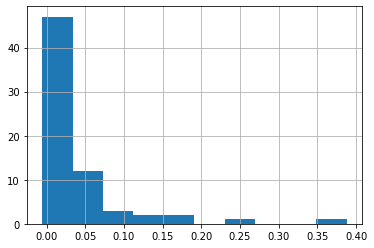

Shapiro test p-value: 2.7415860380519685e-12 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=5.190050789878452, pvalue=2.126103961491274e-06)
WilcoxonResult(statistic=24.0, pvalue=2.20607503277004e-12)

Mean a: 0.8663879013146091 (0.03786192071688472), mean b: 0.8282524259274521 (0.07355341474145959)


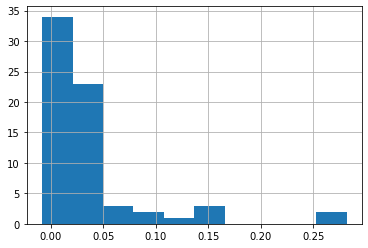

Shapiro test p-value: 1.817445499652237e-11 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=5.861184478899397, pvalue=1.543816494497923e-07)
WilcoxonResult(statistic=23.0, pvalue=2.1116273786780857e-12)

TEST CASES (standard vs hybrid)
Mean a: 0.8429919419055484 (0.06147847460693606), mean b: 0.8072041323059529 (0.09377754678300515)


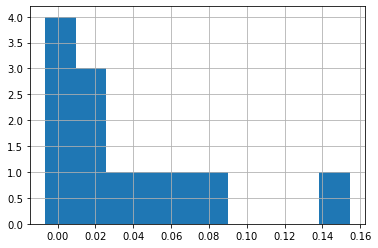

Shapiro test p-value: 0.01702302321791649 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=2.704937897797092, pvalue=0.02047527682228223)
WilcoxonResult(statistic=5.0, pvalue=0.0048828125)

Mean a: 0.8429919419055484 (0.06147847460693606), mean b: 0.8068534251231035 (0.09416040190348306)


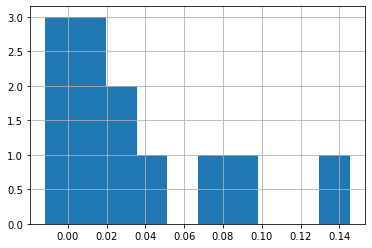

Shapiro test p-value: 0.06999139487743378 (NOTE we assume normal distribution if larger than 0.05)
Normally distributed, so use paired T-test
Ttest_relResult(statistic=2.7732319641533754, pvalue=0.018121942622067917)
WilcoxonResult(statistic=6.0, pvalue=0.0068359375)



We're testing task 510 !

VALIDATION CASES (standard vs hybrid)
Mean a: 0.8193018194980247 (0.07852171627461482), mean b: 0.7688979026632243 (0.10202272005338572)


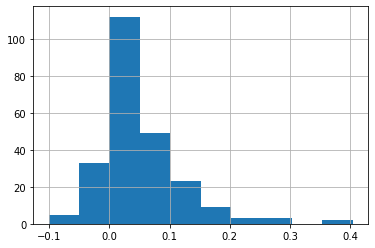

Shapiro test p-value: 2.098648132446007e-13 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=11.857906854653182, pvalue=8.571930517488296e-26)
WilcoxonResult(statistic=2383.0, pvalue=5.392535193335858e-29)

Mean a: 0.8193018194980247 (0.07852171627461482), mean b: 0.7654487452345204 (0.11036371392169908)


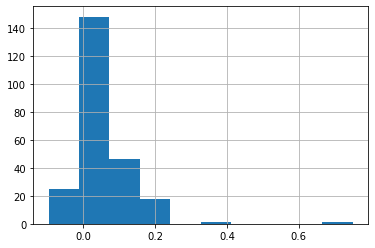

Shapiro test p-value: 1.9617880696402165e-18 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=10.74899905281444, pvalue=3.167539539683612e-22)
WilcoxonResult(statistic=2515.0, pvalue=2.147761793190119e-28)

TEST CASES (standard vs hybrid)
Mean a: 0.8026767049400811 (0.0884658941253221), mean b: 0.7747661608683407 (0.08693813377667559)


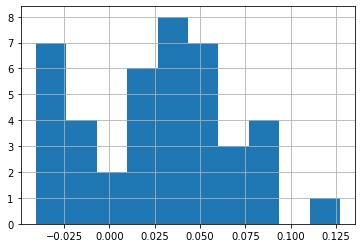

Shapiro test p-value: 0.19305796921253204 (NOTE we assume normal distribution if larger than 0.05)
Normally distributed, so use paired T-test
Ttest_relResult(statistic=4.347797094500763, pvalue=8.870208833292873e-05)
WilcoxonResult(statistic=150.0, pvalue=0.00016334267299142083)

Mean a: 0.8026767049400811 (0.0884658941253221), mean b: 0.7744410810504414 (0.08663158558573278)


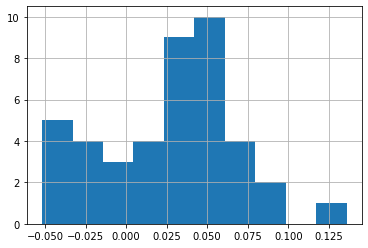

Shapiro test p-value: 0.18217387795448303 (NOTE we assume normal distribution if larger than 0.05)
Normally distributed, so use paired T-test
Ttest_relResult(statistic=4.332926892168581, pvalue=9.290426750862864e-05)
WilcoxonResult(statistic=156.0, pvalue=0.00022003167703712315)



We're testing task 525 !

VALIDATION CASES (standard vs hybrid)
Mean a: 0.7931963214631448 (0.0900208757905026), mean b: 0.5852100016424058 (0.24405728055174836)


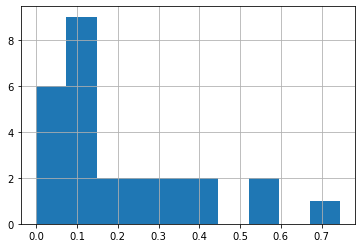

Shapiro test p-value: 0.0009537605219520628 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=5.498563564080371, pvalue=1.031959304458661e-05)
WilcoxonResult(statistic=1.0, pvalue=9.338596171049022e-06)

Mean a: 0.7931963214631448 (0.0900208757905026), mean b: 0.5751974287832409 (0.26124965849476395)


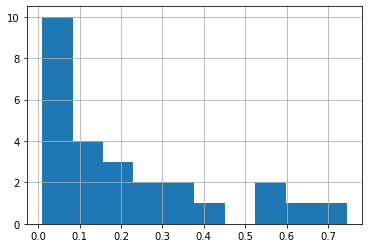

Shapiro test p-value: 0.0012687811395153403 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=5.262308228290319, pvalue=1.893373323401107e-05)
WilcoxonResult(statistic=0.0, pvalue=8.29809930635731e-06)

TEST CASES (standard vs hybrid)
Mean a: 0.7263390427722585 (0.20821736332111812), mean b: 0.3828723021728537 (0.3190335025007075)


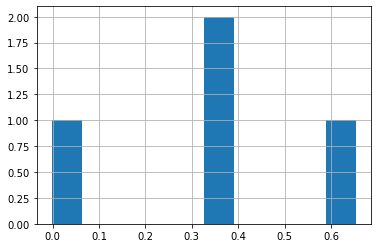

Shapiro test p-value: 0.7050624489784241 (NOTE we assume normal distribution if larger than 0.05)
Normally distributed, so use paired T-test
Ttest_relResult(statistic=2.5580084708302664, pvalue=0.0833586416587511)
WilcoxonResult(statistic=1.0, pvalue=0.25)

Mean a: 0.7263390427722585 (0.20821736332111812), mean b: 0.3639661267243504 (0.31917336072102653)


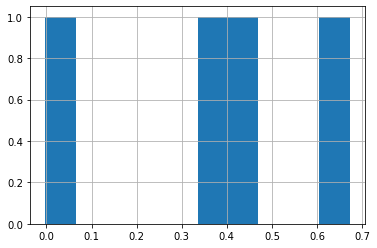

Shapiro test p-value: 0.7679451107978821 (NOTE we assume normal distribution if larger than 0.05)
Normally distributed, so use paired T-test
Ttest_relResult(statistic=2.607366602295232, pvalue=0.07986619081220285)
WilcoxonResult(statistic=1.0, pvalue=0.25)



In [5]:
tasks = [con.TASK_501, con.TASK_510, con.TASK_525]
config = con.CONFIG_FULL
labels = [1]

for task in tasks:
    print("\n\nWe're testing task", task, "!\n")
    # Get paths for standard and hybrid
    standard_val_path, standard_test_path = data.get_results_validation_and_test_paths(results_dir, task, config, con.CLASSIC) 
    hybrid_val_path, hybrid_test_path = data.get_results_validation_and_test_paths(results_dir, task, config, con.HYBRID2) 
    hybridlr_val_path, hybridlr_test_path = data.get_results_validation_and_test_paths(results_dir, task, config, con.HYBRID2LR) 

    # Load all data
    standard_val_data = data.load_summary_dices_data_array(standard_val_path)
    standard_test_data = data.load_summary_dices_data_array(standard_test_path)
    hybrid_val_data = data.load_summary_dices_data_array(hybrid_val_path)
    hybrid_test_data = data.load_summary_dices_data_array(hybrid_test_path)
    hybridlr_val_data = data.load_summary_dices_data_array(hybridlr_val_path)
    hybridlr_test_data = data.load_summary_dices_data_array(hybridlr_test_path)

    # VALIDATION CASES
    print("VALIDATION CASES (standard vs hybrid)")
    perform_t_test(standard_val_data, hybrid_val_data)
    perform_t_test(standard_val_data, hybridlr_val_data)

    print("TEST CASES (standard vs hybrid)")
    perform_t_test(standard_test_data, hybrid_test_data)
    perform_t_test(standard_test_data, hybridlr_test_data)

    # # also test 1500
    # if task == con.TASK_501:
    #     standard_val_path, standard_test_path = data.get_results_validation_and_test_paths(results_dir, task, config, con.CLASSIC_1500) 
    #     hybrid_val_path, hybrid_test_path = data.get_results_validation_and_test_paths(results_dir, task, config, con.HYBRID2LR_1500) 

    #     # Load all data
    #     standard_val_data = data.load_summary_dices_data_array(standard_val_path)
    #     standard_test_data = data.load_summary_dices_data_array(standard_test_path)
    #     hybrid_val_data = data.load_summary_dices_data_array(hybrid_val_path)
    #     hybrid_test_data = data.load_summary_dices_data_array(hybrid_test_path)

    #     # VALIDATION CASES
    #     print("VALIDATION CASES 1500 (standard vs hybrid)")
    #     perform_t_test(standard_val_data, hybrid_val_data)

    #     print("TEST CASES 1500 (standard vs hybrid)")
    #     perform_t_test(standard_test_data, hybrid_test_data)

Experiment 3

FIRST ANALYSIS: does performance improve when we include other organs?

VALIDATION CASES (standard vs maximal)
Mean a: 0.7931963214631448 (0.0900208757905026), mean b: 0.7844967645288452 (0.14058853906587265)


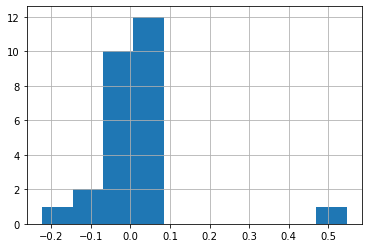

Shapiro test p-value: 4.826245572076004e-07 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=0.3527916443407562, pvalue=0.7272018074846862)
WilcoxonResult(statistic=156.0, pvalue=0.6204162095825689)

VALIDATION CASES (standard vs minimum)
Mean a: 0.7931963214631448 (0.0900208757905026), mean b: 0.7904159960132576 (0.08685938978645448)


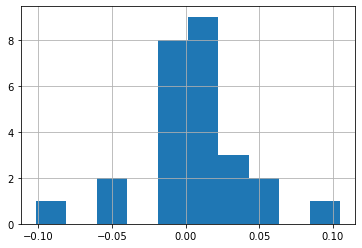

Shapiro test p-value: 0.02946593053638935 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=0.38174794543686014, pvalue=0.7058739157364992)
WilcoxonResult(statistic=159.0, pvalue=0.6751674415281835)

TEST CASES (standard vs maximal)
Mean a: 0.7263390427722585 (0.20821736332111812), mean b: 0.8519457135275205 (0.04256022734195072)


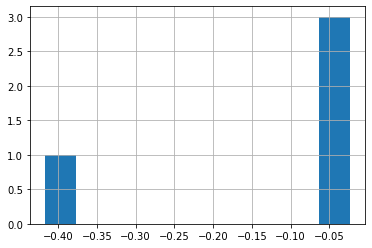

Shapiro test p-value: 0.002774907276034355 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=-1.2944813633252985, pvalue=0.286132480733429)
WilcoxonResult(statistic=0.0, pvalue=0.125)

TEST CASES (standard vs minimal)
Mean a: 0.7263390427722585 (0.20821736332111812), mean b: 0.8314352663228077 (0.04189331820828874)


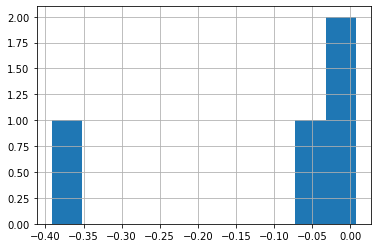

Shapiro test p-value: 0.019590863958001137 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=-1.0913390516476609, pvalue=0.3549307618591935)
WilcoxonResult(statistic=3.0, pvalue=0.625)

SECOND ANALYSIS: does performance improve when we use a weighted loss? First for all organs

VALIDATION CASES MINIMAL (w0.1 vs w1)
Mean a: 0.8124100886756942 (0.0656311256617785), mean b: 0.7904159960132576 (0.08685938978645448)


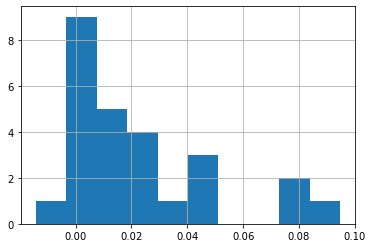

Shapiro test p-value: 0.0031529697589576244 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=3.9658579702763106, pvalue=0.0005408218452432185)
WilcoxonResult(statistic=36.0, pvalue=0.00039557595986854034)

VALIDATION CASES MINIMAL (w0.5 vs w1)
Mean a: 0.8038724952794853 (0.07901612860204266), mean b: 0.7904159960132576 (0.08685938978645448)


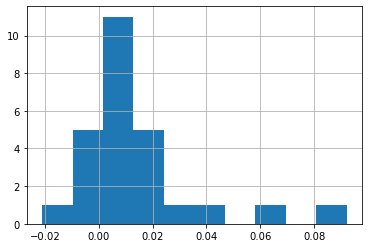

Shapiro test p-value: 0.0002064612926915288 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=3.026939551286946, pvalue=0.00565920228661647)
WilcoxonResult(statistic=45.0, pvalue=0.0009182818799141572)

VALIDATION CASES MINIMAL (w0.9 vs w1)
Mean a: 0.7937125014575653 (0.10211790521006477), mean b: 0.7904159960132576 (0.08685938978645448)


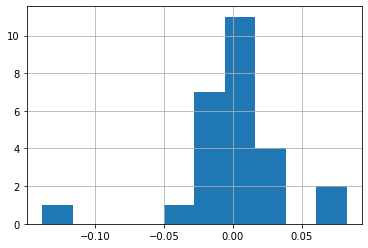

Shapiro test p-value: 0.00022090681886766106 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=0.4303074771636118, pvalue=0.670658852611129)
WilcoxonResult(statistic=137.0, pvalue=0.3281623065662794)

TEST CASES MINIMAL (w0.1 vs w1)
Mean a: 0.849332293470518 (0.03885699444276547), mean b: 0.8314352663228077 (0.04189331820828874)


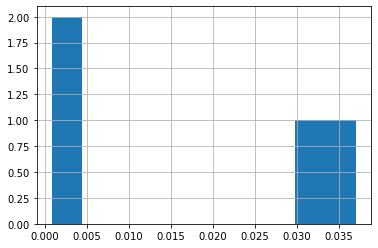

Shapiro test p-value: 0.24009986221790314 (NOTE we assume normal distribution if larger than 0.05)
Normally distributed, so use paired T-test
Ttest_relResult(statistic=1.961115283536517, pvalue=0.14469467088418758)
WilcoxonResult(statistic=0.0, pvalue=0.125)

TEST CASES MINIMAL (w0.5 vs w1)
Mean a: 0.8475976788724935 (0.04123101393002062), mean b: 0.8314352663228077 (0.04189331820828874)


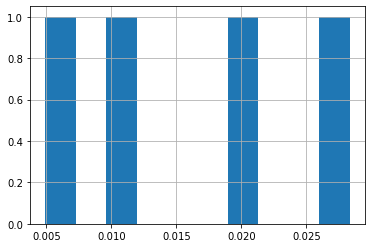

Shapiro test p-value: 0.9522606134414673 (NOTE we assume normal distribution if larger than 0.05)
Normally distributed, so use paired T-test
Ttest_relResult(statistic=3.1985868883760094, pvalue=0.049385211980815566)
WilcoxonResult(statistic=0.0, pvalue=0.125)

TEST CASES MINIMAL (w0.1 vs w1)
Mean a: 0.8364743035010885 (0.045671567288570164), mean b: 0.8314352663228077 (0.04189331820828874)


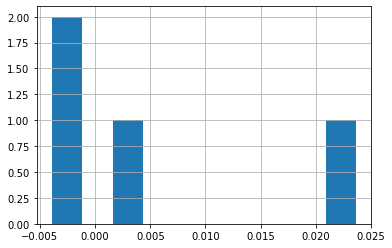

Shapiro test p-value: 0.09360432624816895 (NOTE we assume normal distribution if larger than 0.05)
Normally distributed, so use paired T-test
Ttest_relResult(statistic=0.7975734553635128, pvalue=0.4834118951083891)
WilcoxonResult(statistic=4.0, pvalue=0.875)

VALIDATION CASES MAXIMAL (w0.1 vs w1)
Mean a: 0.8135630142310248 (0.062175047014431946), mean b: 0.7844967645288452 (0.14058853906587265)


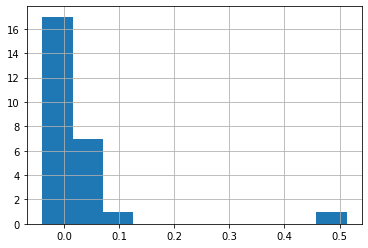

Shapiro test p-value: 4.71923389255835e-09 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=1.4538698641267593, pvalue=0.1584221450549735)
WilcoxonResult(statistic=100.0, pvalue=0.05516844006464357)

VALIDATION CASES MAXIMAL (w0.5 vs w1)
Mean a: 0.8031972086138157 (0.10674988011790582), mean b: 0.7844967645288452 (0.14058853906587265)


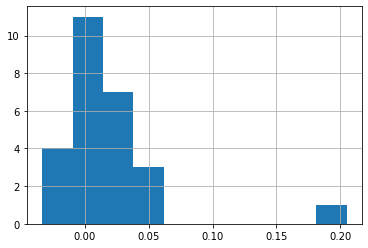

Shapiro test p-value: 4.828294777325937e-07 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=2.253258982398968, pvalue=0.033263043271865446)
WilcoxonResult(statistic=56.0, pvalue=0.002404892089595166)

VALIDATION CASES MAXIMAL (w0.9 vs w1)
Mean a: 0.7905264715157065 (0.1292663795756006), mean b: 0.7844967645288452 (0.14058853906587265)


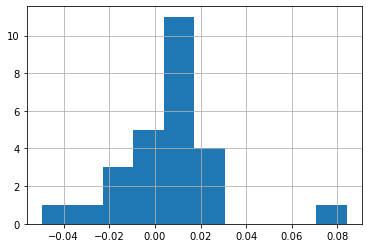

Shapiro test p-value: 0.0010318930726498365 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=1.3424611427949444, pvalue=0.19151065155468253)
WilcoxonResult(statistic=112.0, pvalue=0.10679414793082384)

TEST CASES MAXIMAL (w0.1 vs w1)
Mean a: 0.853288764793057 (0.042001573753277004), mean b: 0.8519457135275205 (0.04256022734195072)


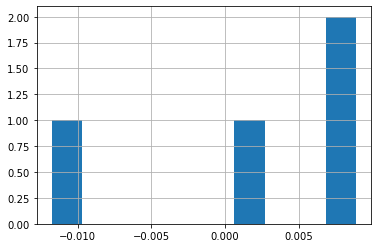

Shapiro test p-value: 0.3430156409740448 (NOTE we assume normal distribution if larger than 0.05)
Normally distributed, so use paired T-test
Ttest_relResult(statistic=0.2882031245536991, pvalue=0.7919559518040358)
WilcoxonResult(statistic=4.0, pvalue=0.875)

TEST CASES MAXIMAL (w0.5 vs w1)
Mean a: 0.8535126031323763 (0.042186134879209816), mean b: 0.8519457135275205 (0.04256022734195072)


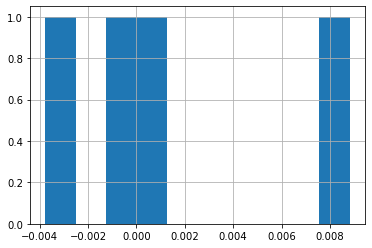

Shapiro test p-value: 0.645484447479248 (NOTE we assume normal distribution if larger than 0.05)
Normally distributed, so use paired T-test
Ttest_relResult(statistic=0.59311064448122, pvalue=0.5948484375506866)
WilcoxonResult(statistic=4.0, pvalue=0.875)

TEST CASES MAXIMAL (w0.1 vs w1)
Mean a: 0.8525587302969067 (0.036879377435710715), mean b: 0.8519457135275205 (0.04256022734195072)


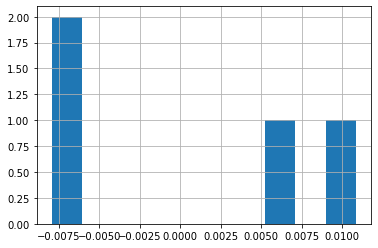

Shapiro test p-value: 0.19882965087890625 (NOTE we assume normal distribution if larger than 0.05)
Normally distributed, so use paired T-test
Ttest_relResult(statistic=0.12804211662111017, pvalue=0.9062168192554616)
WilcoxonResult(statistic=5.0, pvalue=1.0)



In [2]:
config = con.CONFIG_FULL
labels = [1]

############ ONLY ANALYSE INCLUDING ORGANS
print("FIRST ANALYSIS: does performance improve when we include other organs?\n")
# get paths
standard_val_path, standard_test_path = data.get_results_validation_and_test_paths(results_dir, con.TASK_525, config, con.CLASSIC) 
max_val_path, max_test_path = data.get_results_validation_and_test_paths(results_dir, con.TASK_526, config, con.CLASSIC) 
min_val_path, min_test_path = data.get_results_validation_and_test_paths(results_dir, con.TASK_527, config, con.CLASSIC) 

# load data
standard_val_data = data.load_summary_dices_data_array(standard_val_path)
standard_test_data = data.load_summary_dices_data_array(standard_test_path)
max_val_data = data.load_summary_dices_data_array(max_val_path)
max_test_data = data.load_summary_dices_data_array(max_test_path)
min_val_data = data.load_summary_dices_data_array(min_val_path)
min_test_data = data.load_summary_dices_data_array(min_test_path)

print("VALIDATION CASES (standard vs maximal)")
perform_t_test(standard_val_data, max_val_data)

print("VALIDATION CASES (standard vs minimum)")
perform_t_test(standard_val_data, min_val_data)

print("TEST CASES (standard vs maximal)")
perform_t_test(standard_test_data, max_test_data)
print("TEST CASES (standard vs minimal)")
perform_t_test(standard_test_data, min_test_data)

#### ANALYSE LOSSES AS WELL
print("SECOND ANALYSIS: does performance improve when we use a weighted loss? First for all organs\n")
# Get paths
minimal_w01_val_path, minimal_w01_test_path = data.get_results_validation_and_test_paths(results_dir, con.TASK_527, config, con.WEIGHT01) 
minimal_w05_val_path, minimal_w05_test_path = data.get_results_validation_and_test_paths(results_dir, con.TASK_527, config, con.WEIGHT05) 
minimal_w09_val_path, minimal_w09_test_path = data.get_results_validation_and_test_paths(results_dir, con.TASK_527, config, con.WEIGHT09) 
maximal_w01_val_path, maximal_w01_test_path = data.get_results_validation_and_test_paths(results_dir, con.TASK_526, config, con.WEIGHT01) 
maximal_w05_val_path, maximal_w05_test_path = data.get_results_validation_and_test_paths(results_dir, con.TASK_526, config, con.WEIGHT05) 
maximal_w09_val_path, maximal_w09_test_path = data.get_results_validation_and_test_paths(results_dir, con.TASK_526, config, con.WEIGHT09) 

# Minima: w0.1 vs w1
min_w01_val_data = data.load_summary_dices_data_array(minimal_w01_val_path)
min_w01_test_data = data.load_summary_dices_data_array(minimal_w01_test_path)
min_w05_val_data = data.load_summary_dices_data_array(minimal_w05_val_path)
min_w05_test_data = data.load_summary_dices_data_array(minimal_w05_test_path)
min_w09_val_data = data.load_summary_dices_data_array(minimal_w09_val_path)
min_w09_test_data = data.load_summary_dices_data_array(minimal_w09_test_path)

print("VALIDATION CASES MINIMAL (w0.1 vs w1)")
perform_t_test(min_w01_val_data, min_val_data)
print("VALIDATION CASES MINIMAL (w0.5 vs w1)")
perform_t_test(min_w05_val_data, min_val_data)
print("VALIDATION CASES MINIMAL (w0.9 vs w1)")
perform_t_test(min_w09_val_data, min_val_data)

print("TEST CASES MINIMAL (w0.1 vs w1)")
perform_t_test(min_w01_test_data, min_test_data)
print("TEST CASES MINIMAL (w0.5 vs w1)")
perform_t_test(min_w05_test_data, min_test_data)
print("TEST CASES MINIMAL (w0.1 vs w1)")
perform_t_test(min_w09_test_data, min_test_data)

# Max: w0.1 vs w1
max_w01_val_data = data.load_summary_dices_data_array(maximal_w01_val_path)
max_w01_test_data = data.load_summary_dices_data_array(maximal_w01_test_path)
max_w05_val_data = data.load_summary_dices_data_array(maximal_w05_val_path)
max_w05_test_data = data.load_summary_dices_data_array(maximal_w05_test_path)
max_w09_val_data = data.load_summary_dices_data_array(maximal_w09_val_path)
max_w09_test_data = data.load_summary_dices_data_array(maximal_w09_test_path)

print("VALIDATION CASES MAXIMAL (w0.1 vs w1)")
perform_t_test(max_w01_val_data, max_val_data)
print("VALIDATION CASES MAXIMAL (w0.5 vs w1)")
perform_t_test(max_w05_val_data, max_val_data)
print("VALIDATION CASES MAXIMAL (w0.9 vs w1)")
perform_t_test(max_w09_val_data, max_val_data)

print("TEST CASES MAXIMAL (w0.1 vs w1)")
perform_t_test(max_w01_test_data, max_test_data)
print("TEST CASES MAXIMAL (w0.5 vs w1)")
perform_t_test(max_w05_test_data, max_test_data)
print("TEST CASES MAXIMAL (w0.1 vs w1)")
perform_t_test(max_w09_test_data, max_test_data)



Experiment 4

FIRST ANALYSIS: does performance improve when we include other organs?

VALIDATION CASES (standard vs pretrained)
Mean a: 0.8518471702892461 (0.1411880574398455), mean b: 0.8651539704763007 (0.11869523522200044)


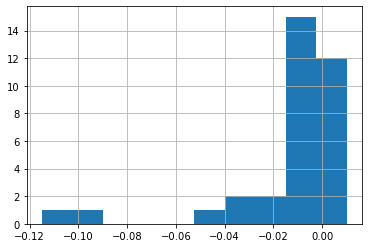

Shapiro test p-value: 5.741587116858682e-08 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=-2.9975535404623606, pvalue=0.00513932155190438)
WilcoxonResult(statistic=76.0, pvalue=0.00015255189226258176)

TEST CASES (standard vs pretrained)
Mean a: 0.7676408221813417 (0.3436692233552665), mean b: 0.7797057030490863 (0.32786946416288215)


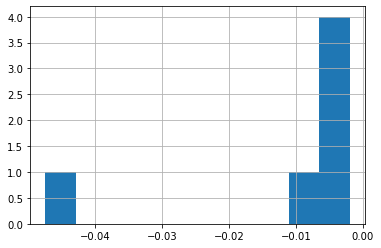

Shapiro test p-value: 0.00036832105251960456 (NOTE we assume normal distribution if larger than 0.05)
Not normally distributed, so use Wilcoxon!
Ttest_relResult(statistic=-1.698785947485445, pvalue=0.15011154526090165)
WilcoxonResult(statistic=0.0, pvalue=0.03125)



In [24]:
config = con.CONFIG_FULL
trainer = con.CLASSIC
labels = [1]

############ ONLY ANALYSE INCLUDING ORGANS
print("FIRST ANALYSIS: does performance improve when we include other organs?\n")
# get paths
standard_val_path, standard_test_path = data.get_results_validation_and_test_paths(results_dir, con.TASK_600, config, trainer) 
pretrained_val_path, pretrained_test_path = data.get_results_validation_and_test_paths(results_dir, con.TASK_601, config, trainer) 

# load data
standard_val_data = data.load_summary_dices_data_array(standard_val_path)
standard_test_data = data.load_summary_dices_data_array(standard_test_path)
pretrained_val_data = data.load_summary_dices_data_array(pretrained_val_path)
pretrained_test_data = data.load_summary_dices_data_array(pretrained_test_path)

print("VALIDATION CASES (standard vs pretrained)")
perform_t_test(standard_val_data, pretrained_val_data)

print("TEST CASES (standard vs pretrained)")
perform_t_test(standard_test_data, pretrained_test_data)

